1. importing libraries

In [5]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'matplotlib'

ModuleNotFoundError: No module named 'google.colab'

2. import Datasets

Mounted at /content/drive/


In [1]:
train_dir = 'C:\\Users\\home\\Downloads\\Emoji_Based_HumanReactions-main\\Emoji_Based_HumanReactions-main\\data\\archive\\train'
test_dir = 'C:\\Users\\home\\Downloads\\Emoji_Based_HumanReactions-main\\Emoji_Based_HumanReactions-main\\data\\archive\\test'

In [2]:
row, col = 48, 48
classes = 7

In [3]:
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(dir_)
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

NameError: name 'os' is not defined

3. PLot of number of images in training set

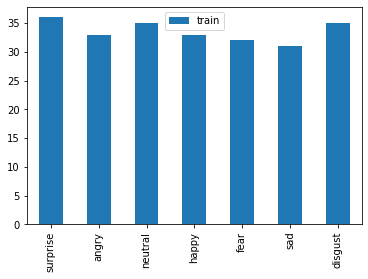

In [ ]:
train_count.transpose().plot(kind='bar')

4. PLot of number of images in testing set

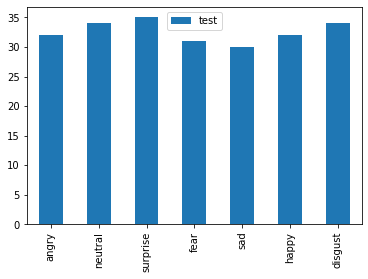

In [ ]:
test_count.transpose().plot(kind='bar')

5. Creating Training and test sets


In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 batch_size=64,
                                                 target_size=(48, 48),
                                                 shuffle=True,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\home\Downloads\Emoji_Based_HumanReactions-main\Emoji_Based_HumanReactions-main\mukesh\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

In [ ]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

6. Defining Model 1

In [ ]:
def model_1(input_size, classes=7):
     
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [ ]:
model_1 = model_1((row,col,1), classes)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


7. Define Model 2

In [ ]:
def model_2(input_size, classes=7):
  
    model= tf.keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #Faltten the model
    model.add(Flatten())

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(classes, activation='softmax'))
    opt = Adam(lr=0.0001 , decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary
    return model

In [ ]:
model_2 = model_2((row,col,1), classes)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.utils import plot_model

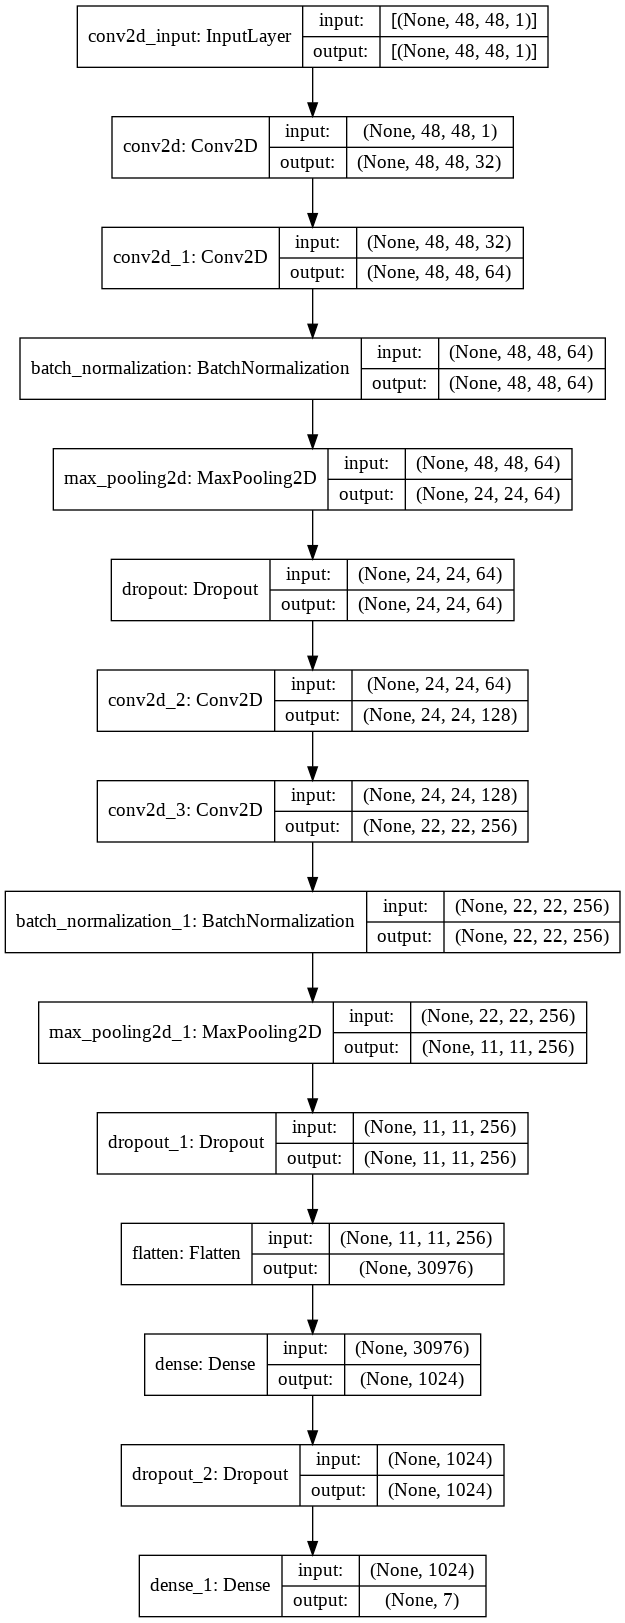

In [ ]:
plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)

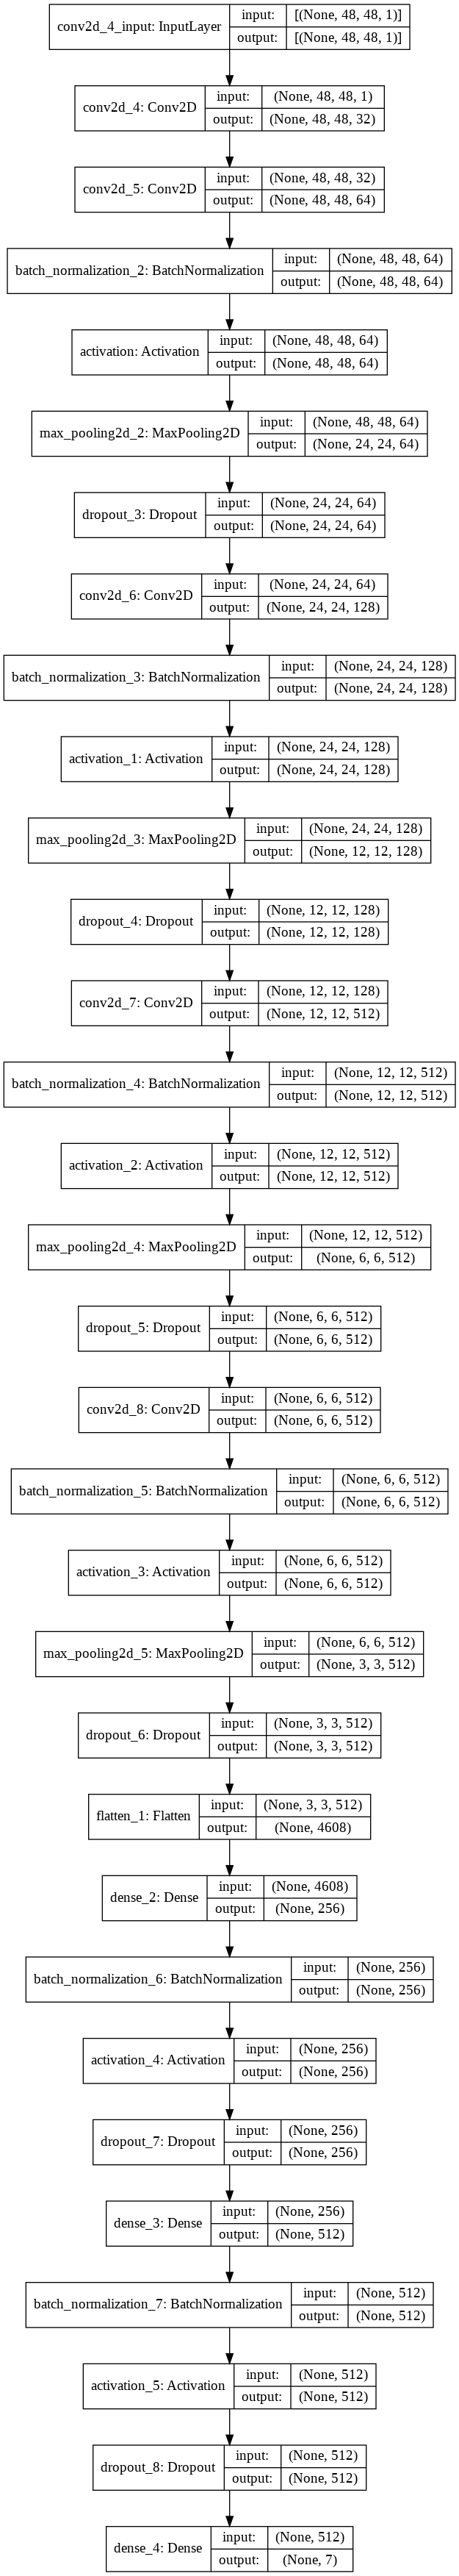

In [ ]:
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)

8. Check Model 1

In [ ]:
chk_path = 'model_1.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

9. Training Model

In [ ]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = model_1.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - 7734s 17s/step - loss: 4.2580 - accuracy: 0.2779 - val_loss: 9.7766 - val_accuracy: 0.1761

Epoch 00001: val_loss improved from inf to 9.77664, saving model to model_1.h5
Epoch 2/60
448/448 [==============================] - 72s 160ms/step - loss: 3.4601 - accuracy: 0.3339 - val_loss: 3.0881 - val_accuracy: 0.3983

Epoch 00002: val_loss improved from 9.77664 to 3.08808, saving model to model_1.h5
Epoch 3/60
448/448 [==============================] - 68s 152ms/step - loss: 2.9422 - accuracy: 0.3670 - val_loss: 2.6539 - val_accuracy: 0.4082

Epoch 00003: val_loss improved from 3.08808 to 2.65391, saving model to model_1.h5
Epoch 4/60
448/448 [==============================] - 67s 149ms/step - loss: 2.5433 - accuracy: 0.3957 - val_loss: 2.2588 - val_accuracy: 0.4438

Epoch 00004: val_loss improved from 2.65391 to 2.25881, saving model to model_1.h5
Epoch 5/60
448/448 [==============================] - 66s 147ms/step - loss: 2.2115 - ac

10. Check Model_2

In [ ]:
chk_path_2 = 'model_2.h5'
log_dir_2 = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint_2 = ModelCheckpoint(filepath=chk_path_2,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop_2 = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

tensorboard_callback_2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir_2, histogram_freq=1)
csv_logger_2 = CSVLogger('training.log')

callback_2 = [checkpoint_2, reduce_lr_2, csv_logger_2]

11. Training Model

In [ ]:
model_2_hist = model_2.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callback_2,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 [==============================] - 74s 160ms/step - loss: 8.4372 - accuracy: 0.2229 - val_loss: 7.4737 - val_accuracy: 0.2472

Epoch 00001: val_loss improved from inf to 7.47365, saving model to model_2.h5
Epoch 2/60
448/448 [==============================] - 69s 154ms/step - loss: 6.7345 - accuracy: 0.2627 - val_loss: 5.8725 - val_accuracy: 0.2895

Epoch 00002: val_loss improved from 7.47365 to 5.87251, saving model to model_2.h5
Epoch 3/60
448/448 [==============================] - 70s 156ms/step - loss: 5.2980 - accuracy: 0.2968 - val_loss: 4.6093 - val_accuracy: 0.3313

Epoch 00003: val_loss improved from 5.87251 to 4.60926, saving model to model_2.h5
Epoch 4/60
448/448 [==============================] - 69s 154ms/step - loss: 4.2189 - accuracy: 0.3268 - val_loss: 3.6856 - val_accuracy: 0.3883

Epoch 00004: val_loss improved from 4.60926 to 3.68559, saving model to model_2.h5
Epoch 5/60
448/448 [==============================] - 71s 158ms/step - loss: 3.4325 - ac

12. Loss & Accuracy Plot Model 1

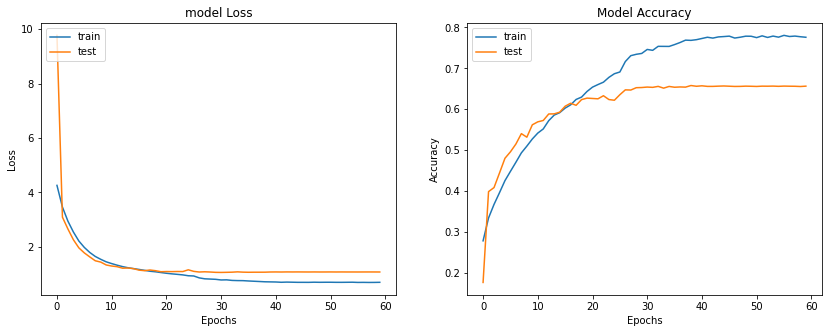

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

13. Loss & Accuracy Plot Model 2

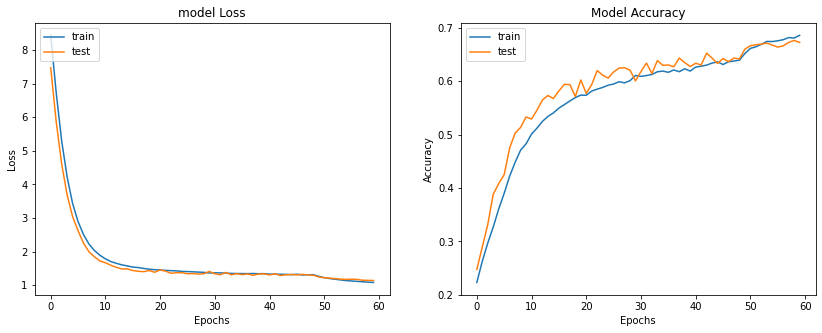

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(model_2_hist.history['loss'])
plt.plot(model_2_hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 2 shows best result , so we will approach that.**

14. Model evaluation

In [ ]:
def model_data(model):
    train_loss, train_accu = model.evaluate(training_set)
    test_loss, test_accu = model.evaluate(test_set)
    return print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

In [ ]:
model_data(model_1)

113/113 [==============================] - 11s 94ms/step - loss: 1.0723 - accuracy: 0.6563
final train accuracy = 84.76 , validation accuracy = 65.63


In [ ]:
model_data(model_2)

113/113 [==============================] - 11s 93ms/step - loss: 1.1370 - accuracy: 0.6726
final train accuracy = 74.62 , validation accuracy = 67.26



15. Save Model 1 & Model 2

In [ ]:
model_1.save_weights('model_1_bestweight.h5')

In [ ]:
model_2.save_weights('model_2_bestweight.h5')


16 . Confusion Matrix and Classification on training set

Confusion Matrix
[[128  10 108 252 171 169 120]
 [ 12   0  11  34  24  22   8]
 [171   7 102 253 202 176 113]
 [256  17 207 453 359 287 195]
 [165   9 127 306 265 232 129]
 [176  16 159 315 209 209 163]
 [128   4  91 205 146 155 102]]
Classification Report
              precision    recall  f1-score   support

       angry       0.12      0.13      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.13      0.10      0.11      1024
       happy       0.25      0.26      0.25      1774
     neutral       0.19      0.21      0.20      1233
         sad       0.17      0.17      0.17      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



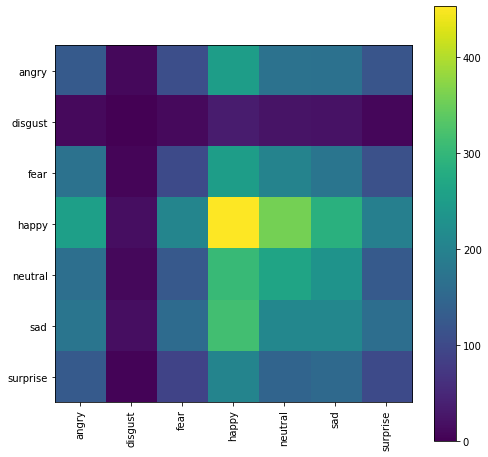

In [ ]:
y_pred = model_1.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)



17. Confusion Matrix and Classification on test set


Confusion Matrix
[[ 485   57  403 1062  795  744  449]
 [  51    5   55  115   83   84   43]
 [ 515   68  416  992  898  747  471]
 [ 789  103  741 1938 1432 1355  857]
 [ 590   75  531 1277 1003  905  584]
 [ 578   53  468 1300  932  922  577]
 [ 401   47  319  838  631  580  355]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.12      0.13      3995
     disgust       0.01      0.01      0.01       436
        fear       0.14      0.10      0.12      4107
       happy       0.26      0.27      0.26      7215
     neutral       0.17      0.20      0.19      4965
         sad       0.17      0.19      0.18      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.18     28719
   macro avg       0.14      0.14      0.14     28719
weighted avg       0.18      0.18      0.18     28719



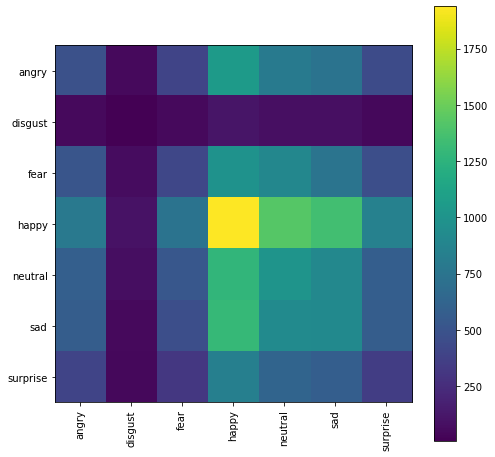

In [ ]:
y_pred = model_2.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

**Using openCV haarcascade xml detect the bounding boxes of face in the webcam and predict the emotions:**



In [3]:

import cv2
cv2.ocl.setUseOpenCL(False)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier(r'C:\Users\home\Downloads\Emoji_Based_HumanReactions-main\Emoji_Based_HumanReactions-main\haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
      cap.release()
      cv2.destroyAllWindows()
    break